# This is our workspace for data analysis!

In [14]:
# feel free to add more
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections
import statsmodels.api as sm

In [15]:
# Create connection to atlas
conn_atlas = sqlite3.connect('./atlas.db')
c_atlas = conn_atlas.cursor()

In [16]:
LIST_TABLES_CMD = "SELECT name FROM sqlite_master WHERE type='table';"

# You can switch this to any table
LIST_COLUMNS_CMD_ATLAS = "PRAGMA table_info('acs2015_county_data');"

c_atlas.execute(LIST_TABLES_CMD)
conn_atlas.commit()

for row in c_atlas:
  print(row)

c_atlas.execute(LIST_COLUMNS_CMD_ATLAS)
conn_atlas.commit()

for column in c_atlas:
    print(column)

('Atlas_of_Surveillance_20201007',)
('acs2017_county_data',)
('acs2015_county_data',)
(0, 'CountyId', 'TEXT', 0, None, 0)
(1, 'State', 'TEXT', 0, None, 0)
(2, 'County', 'TEXT', 0, None, 0)
(3, 'TotalPop', 'TEXT', 0, None, 0)
(4, 'Men', 'TEXT', 0, None, 0)
(5, 'Women', 'TEXT', 0, None, 0)
(6, 'Hispanic', 'TEXT', 0, None, 0)
(7, 'White', 'TEXT', 0, None, 0)
(8, 'Black', 'TEXT', 0, None, 0)
(9, 'Native', 'TEXT', 0, None, 0)
(10, 'Asian', 'TEXT', 0, None, 0)
(11, 'Pacific', 'TEXT', 0, None, 0)
(12, 'VotingAgeCitizen', 'TEXT', 0, None, 0)
(13, 'Income', 'TEXT', 0, None, 0)
(14, 'IncomeErr', 'TEXT', 0, None, 0)
(15, 'IncomePerCap', 'TEXT', 0, None, 0)
(16, 'IncomePerCapErr', 'TEXT', 0, None, 0)
(17, 'Poverty', 'TEXT', 0, None, 0)
(18, 'ChildPoverty', 'TEXT', 0, None, 0)
(19, 'Professional', 'TEXT', 0, None, 0)
(20, 'Service', 'TEXT', 0, None, 0)
(21, 'Office', 'TEXT', 0, None, 0)
(22, 'Construction', 'TEXT', 0, None, 0)
(23, 'Production', 'TEXT', 0, None, 0)
(24, 'Drive', 'TEXT', 0, None, 0)

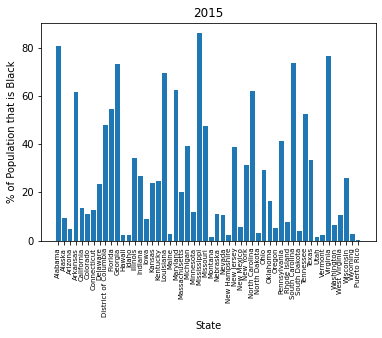

In [17]:
# Feel free to change to demographic groups
cursor_2015_black = conn_atlas.cursor()
SELECT_BLACK_2015 = "SELECT Black from acs2015_county_data"
cursor_2015_black.execute(SELECT_BLACK_2015)

cursor_2015_state = conn_atlas.cursor()
SELECT_STATE_2015 = "SELECT State from acs2015_county_data"
cursor_2015_state.execute(SELECT_STATE_2015)
black_2015 = [float(a[0]) for a in cursor_2015_black]
state_2015 = [a[0] for a in cursor_2015_state]

plot_state_race = plt.bar(state_2015, black_2015)
plt.title('2015')
plt.xlabel('State')
plt.ylabel('% of Population that is Black')
plt.xticks(fontsize=7, rotation=90)
plt.show()

# OLS workspace
- array with number of each race in a county (multiply percentage by total pop)
- array with total number of surveillance devices in a county (need SQL query for this)
    - SQL query to join 

In [18]:
# Number of black people in each county
# black_2015

# Feel free to change to demographic groups
cursor_2015_total_pop = conn_atlas.cursor()
SELECT_TOTAL_POP_2015 = "SELECT TotalPop from acs2015_county_data"
cursor_2015_total_pop.execute(SELECT_TOTAL_POP_2015)
total_pop_2015 = [float(a[0]) for a in cursor_2015_total_pop]
total_pop_black_2015 = []
for i in range(len(total_pop_2015)) :
    total_pop_black_2015.append(total_pop_2015[i] * black_2015[i])

In [19]:
# select *
# from Db1.dbo.Clients c
# join Db2.dbo.Messages m on c.ClientId = m.ClientId


COUNT_QUERY = 'SELECT * FROM acs2015_county_data INNER JOIN Atlas_of_Surveillance_20201007 ON acs2015_county_data.County = Atlas_of_Surveillance_20201007.County'
JOIN_QUERY = 'SELECT acs2015_county_data.White, acs2015_county_data.TotalPop, (Atlas_of_surveillance_20201007.State || \' \' || Atlas_of_Surveillance_20201007.County) FROM Atlas_of_Surveillance_20201007, acs2015_county_data WHERE (acs2015_county_data.State || acs2015_county_data.County) = (Atlas_of_Surveillance_20201007.State || Atlas_of_Surveillance_20201007.County);'
c_atlas = conn_atlas.cursor()
c_atlas.execute(JOIN_QUERY)
conn_atlas.commit()

In [20]:
# x should be number of a demographic group per county
# y should be number of cameras found
cameras_per_county = collections.Counter([row[2] for row in c_atlas])
pop_black = {}
c_atlas = conn_atlas.cursor()
c_atlas.execute(JOIN_QUERY)
conn_atlas.commit()
for row in c_atlas :
    percent_black, total_pop, county_state = row
    pop_black[county_state] = float(percent_black)

x = []
y = []
for county_state in cameras_per_county :
    y.append(cameras_per_county[county_state])
    x.append(pop_black[county_state])
x, y = np.array(x), np.array(y)
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     136.5
Date:                Tue, 20 Oct 2020   Prob (F-statistic):           4.92e-30
Time:                        16:16:04   Log-Likelihood:                -4398.5
No. Observations:                1288   AIC:                             8801.
Df Residuals:                    1286   BIC:                             8811.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.5607      0.825     16.432      0.0